In [ ]:
!pip uninstall -y opencv-python opencv-contrib-python
!pip install opencv-contrib-python==4.7.0.72


Found existing installation: opencv-contrib-python 4.7.0.72
Uninstalling opencv-contrib-python-4.7.0.72:
  Successfully uninstalled opencv-contrib-python-4.7.0.72
  Using cached opencv_contrib_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached opencv_contrib_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (67.9 MB)


In [ ]:
import cv2
tracker = cv2.legacy.MultiTracker_create()



In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow

video_path = "/content/sample_data/mot.mp4"
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
if not ret:
    print("Error loading video")
else:
    print("Video loaded, frame size:", frame.shape)


Video loaded, frame size: (720, 1280, 3)


In [ ]:
import cv2
bboxes = [
    (310, 160, 60, 120),
    (460, 170, 55, 110),
    (610, 150, 65, 125),
    (760, 180, 58, 105)
]

trackers = cv2.legacy.MultiTracker_create()
for bbox in bboxes:
    tracker = cv2.legacy.TrackerCSRT_create()
    trackers.add(tracker, frame, bbox)



In [ ]:
import scipy
def get_dominant_color(frame, box):
    x, y, w, h = [int(v) for v in box]
    jersey_region = frame[y + int(h * 0.25): y + int(h * 0.45), x + int(w * 0.25): x + int(w * 0.75)]
    if jersey_region.size == 0:
        return None
    pixels = jersey_region.reshape(-1, 3)
    median_color = np.median(pixels, axis=0)
    return median_color


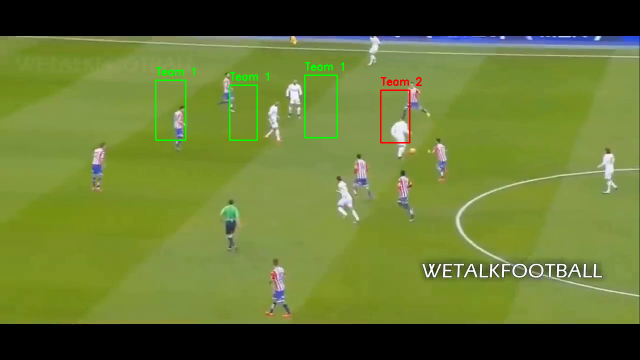

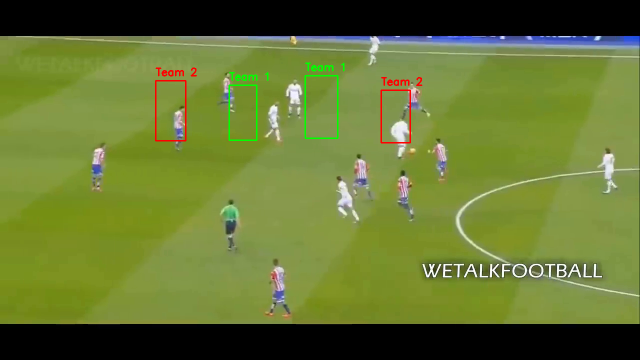

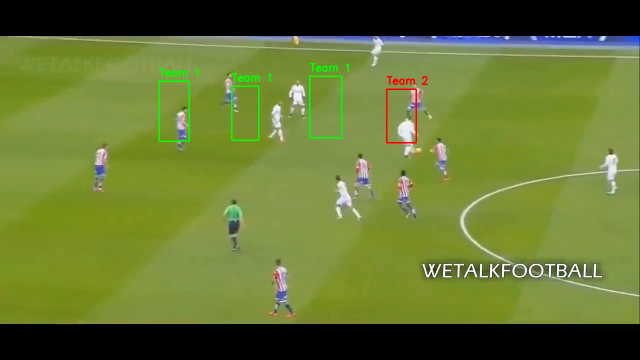

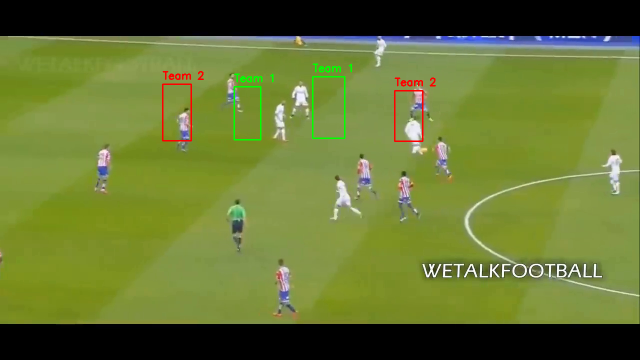

In [ ]:
shown = 0
while shown < 4:
    ret, frame = cap.read()
    if not ret:
        break
    success, boxes = trackers.update(frame)
    jersey_colors = []
    for box in boxes:
        color = get_dominant_color(frame, box)
        if color is None:
            color = np.array([0,0,0])
        jersey_colors.append(color)
    if len(jersey_colors) > 1:
        km = KMeans(n_clusters=2, random_state=0).fit(jersey_colors)
        labels = km.labels_
    else:
        labels = [0]*len(jersey_colors)
    for i, box in enumerate(boxes):
        x, y, w, h = [int(v) for v in box]
        team_color = (0,255,0) if labels[i] == 0 else (0,0,255)
        cv2.rectangle(frame, (x,y), (x+w, y+h), team_color, 2)
        cv2.putText(frame, f'Team {labels[i]+1}', (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, team_color, 2)
    resized_frame = cv2.resize(frame, (640, 360))
    cv2_imshow(resized_frame)
    shown += 1
cap.release()